In [1]:
import numpy as np
import numpy.random
import sympy as sym
import matplotlib.pyplot as plt

# Interpolación con splines

Una función __spline__ es una función que interpola varios puntos $(x_j, y_j)$: es un polinomio cúbico $S_j$ en cada intervalo $(x_{j},x_{j+1})$ que interpola los valores dados:

 - $S_j(x_j) = y_j,\; S_j(x_{j+1}) = y_{j+1}$

y además:

 - $S_{j+1}'(x_{j+1})=S_j'(x_{j+1})$, $j=0,1,\ldots,n-2$ ($S'$ es continua en los nodos)
 - $S_{j+1}''(x_{j+1})=S_j''(x_{j+1})$, $j=0,1,\ldots,n-2$ ($S''$ es continua en los nodos)

Estas condiciones plantean un sistema de $4n$ ecuaciones y $4n-2$ incógnitas, de modo que es habitual completarlo con una condición extra en cada extremo: una en $x_0$ y otra en $x_n$ (aunque también es habitual imponer una condición extra en $x_1$ y otra en $x_{n-1}$).

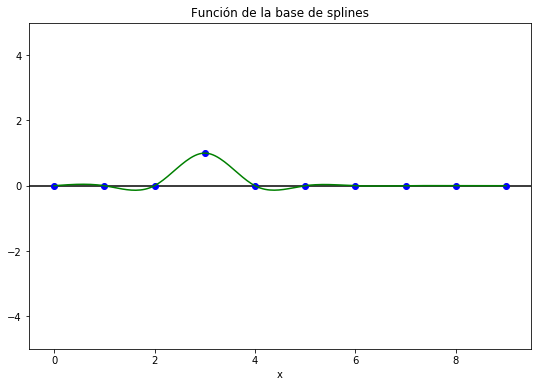

In [2]:
from scipy.interpolate import CubicSpline

x = np.arange(10)
y = [0]*10; y[3]=1
cs3 = CubicSpline(x, y, bc_type='natural')
xs = np.linspace(min(x), max(x), 200)
fig,ax = plt.subplots(figsize=(9, 6))
ax.axhline(color='k')
ax.plot(x, y, 'bo', label='data')
ax.plot(xs, cs3(xs), 'g-', label="L3")
ax.set_title('Función de la base de splines')
plt.xlim(-0.5, 9.5)
plt.xlabel('x')
plt.ylim(-5,5)
plt.show()

### Ejercicio

Lee la documentación de `CubicSpline`:

- Aprende a calcular splines con condiciones de frontera natural y restrigida.
- Aprende a evaluar una función spline en un punto concreto.
- ¿Con qué condiciones de frontera se ha calculado el ejemplo anterior?

### Ejercicio

- Interpola la función $f(x)=\sin(x)$ en el intervalo $[0,2\pi]$ usando $N=6$ puntos de interpolación. Estima el máximo error cometido, compáralo con el error que comete el polinomio interpolador.
- Interpola la función de Runge $f(x)=\frac{1}{1+25\cdot x^2}$ en el intervalo $[-1,1]$ usando $N=6$ puntos de interpolación. Estima el máximo error cometido, compáralo con el error que comete el polinomio interpolador.

#### Base de Lagrange
Cuando buscamos el polinomio $P(x)$ tal que $f(x_i)=y_i$ para un conjunto $x_0, \dots, x_n$, la solución se puede expresar en la forma:

$$
f(x)=\sum_{i=0}^n y_i L_{n,i}(x)
$$

para los polinomios de la __base de Lagrange__:

$$
L_{n,i} = \prod_{k=0,k\neq i}\frac{x-x_k}{x_i-x_k}
$$

El polinomio $L_{n,i}$ *"el único polinomio de grado $\leq n$ tal que"*:
\begin{split}
L_{n,i}(x_k)=0 & \text{ si } k\neq i \\
L_{n,i}(x_i)=1
\end{split}

#### Las splines naturales funcionan igual

Para interpolar sobre un conjunto $x_0,\dots,x_n$, de modo que $f(x_i)=y_i$:
$$
f(x)=\sum_{i=0}^n y_i B_{i}(x)
$$
donde $B_i$ es _"la única spline cúbica natural en los puntos $x_0,\dots,x_n$ tal que"_:
\begin{split}
B_{i}(x_k)=0 & \text{ si } k\neq i \\
B_{i}(x_i)=1
\end{split}


#### Principio de superposición

Definimios $\mathcal{S}_{x_0,\dots,x_n}$ como el conjunto de todas las funciones de clase $\mathcal{C}^{2}$ que además es un polinomio cúbico en cada intervalo $[x_i,x_{i+1}]$, y cuya segunda derivada se anula en $x_0$ y en $x_n$.

> $a,b\in\mathbb{R}, f,g\in\mathcal{S}_{x_0,\dots,x_n} \Rightarrow af+bg\in\mathcal{S}_{x_0,\dots,x_n} $

La fórmula de antes:
$$
f(x)=\sum_{i=0}^n y_i B_{i}(x)
$$
es fácil de demostrar: la función de la derecha es una spline cúbica con condiciones de frontera naturales tal que $f(x_i)=y_i$, pero sabemos que sólo hay función que verifique estas condiciones.

### Ejercicio

- Dibuja todos las funciones de la base de splines para 10 puntos equiespaciados, compáralas con los polinomios de la base de Lagrange.

